In [5]:
import pandas as pd 
data = pd.read_csv('total_data_na.csv')
data.head()

,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Ov,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y
0,Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,...,0.0,0,0,0,0,0.0,0,0,0,0
1,AB de Villiers,12,11,2,480,90,53.33,275,174.54,0,...,0.0,0,0,0,0,0.0,0,0,0,0
2,Abhishek Sharma,3,3,2,63,46,63,33,190.90,0,...,0.0,0,0,0,0,0.0,0,0,0,0
3,Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,0,...,0.0,0,0,0,0,0.0,0,0,0,0
4,Alex Hales,6,6,0,148,45,24.66,118,125.42,0,...,0.0,0,0,0,0,0.0,0,0,0,0


In [6]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import numpy as np


# Select relevant features for clustering
features = data[['Runs.x', 'HS', 'Avg.x', 'BF', 'SR.x', 'X100', 'X50', 'Runs.y', 'Wkts', 'BBI', 'Avg.y', 'Econ', 'SR.y']]

features = features.replace('-', np.nan)
# Impute missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
features = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)


# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

print(features_scaled)


[[ 0.00943771  0.40323538 -0.03937894 ... -1.08126244 -1.3206071
  -1.1344344 ]
 [ 1.98807763  1.78437691  2.14671767 ... -1.08126244 -1.3206071
  -1.1344344 ]
 [-0.39658378  0.40323538  2.72461691 ... -1.08126244 -1.3206071
  -1.1344344 ]
 ...
 [-0.75685636 -1.04068531 -1.04039365 ... -0.04270068  0.36491249
   0.11820146]
 [-0.75685636 -1.04068531 -1.04039365 ...  0.53372595  2.31419659
  -0.23128002]
 [-0.75685636 -1.04068531 -1.04039365 ...  0.42191906  0.23624687
   0.82894469]]


In [7]:


kmeans = KMeans(n_clusters = 3, random_state=42, n_init= 1000)


kmeans.fit(features_scaled)

centroids = kmeans.cluster_centers_
print("Centroids:")
print(centroids)


labels = kmeans.labels_
print("\nLabels:")
print(labels)


Centroids:
[[-0.50046143 -0.54017673 -0.45058281 -0.51949627 -0.36357766 -0.1600461
  -0.43622554  0.48857749  0.42680737  0.          0.57099546  0.68530401
   0.59020988]
 [ 0.21285693  0.53417477  0.34680174  0.28723146  0.55603584 -0.1600461
   0.00553937 -0.88183644 -0.75698935  0.         -1.01879256 -1.19525003
  -1.04636282]
 [ 2.24070575  1.79176269  1.69793966  2.18947406  0.80143018  1.18622403
   2.32368507 -0.79978095 -0.72616725  0.         -0.95899101 -1.20758319
  -1.00508236]]

Labels:
[1 2 1 1 1 2 0 0 0 0 0 0 1 0 2 2 0 0 0 1 0 1 0 1 0 0 2 0 1 1 1 0 0 0 0 1 1
 1 0 0 2 0 2 1 1 1 0 0 2 0 1 1 1 0 0 1 0 0 0 0 0 2 1 1 0 1 1 0 1 0 0 0 1 2
 1 1 1 2 1 0 2 0 2 0 1 0 2 1 0 0 2 2 0 0 0 2 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [8]:
identified_clusters = kmeans.fit_predict(features_scaled)

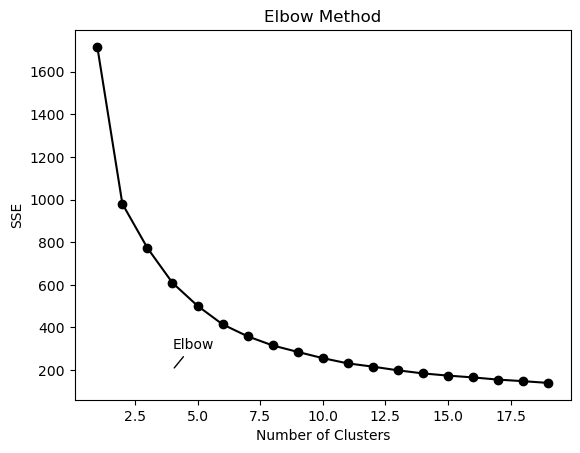

In [9]:
import matplotlib.pyplot as plt
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=100, max_iter=1000)
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)
  

number_clusters = range(1,20)
plt.plot(number_clusters, sse, marker='o', color='black')
plt.annotate('Elbow', xy=(4, 200), xytext=(4, 300), arrowprops={'arrowstyle': '-'})
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()


Silhouette Score for 2 clusters: 0.42447470554644867
Silhouette Score for 3 clusters: 0.37159189257627384
Silhouette Score for 4 clusters: 0.3502604315707096
Silhouette Score for 5 clusters: 0.3636699898874859
Silhouette Score for 6 clusters: 0.3517954059728362
Silhouette Score for 7 clusters: 0.36894750659633324
Silhouette Score for 8 clusters: 0.3665818353360765
Silhouette Score for 9 clusters: 0.3413754855059712
Silhouette Score for 10 clusters: 0.341869576153129
Silhouette Score for 11 clusters: 0.3372075299880495
Silhouette Score for 12 clusters: 0.3450745536053287
Silhouette Score for 13 clusters: 0.34296165137797324
Silhouette Score for 14 clusters: 0.334375922681478
Silhouette Score for 15 clusters: 0.33659501834258393
Silhouette Score for 16 clusters: 0.3257304654161809
Silhouette Score for 17 clusters: 0.3180321074796524
Silhouette Score for 18 clusters: 0.3241721709211243
Silhouette Score for 19 clusters: 0.3189858055167612


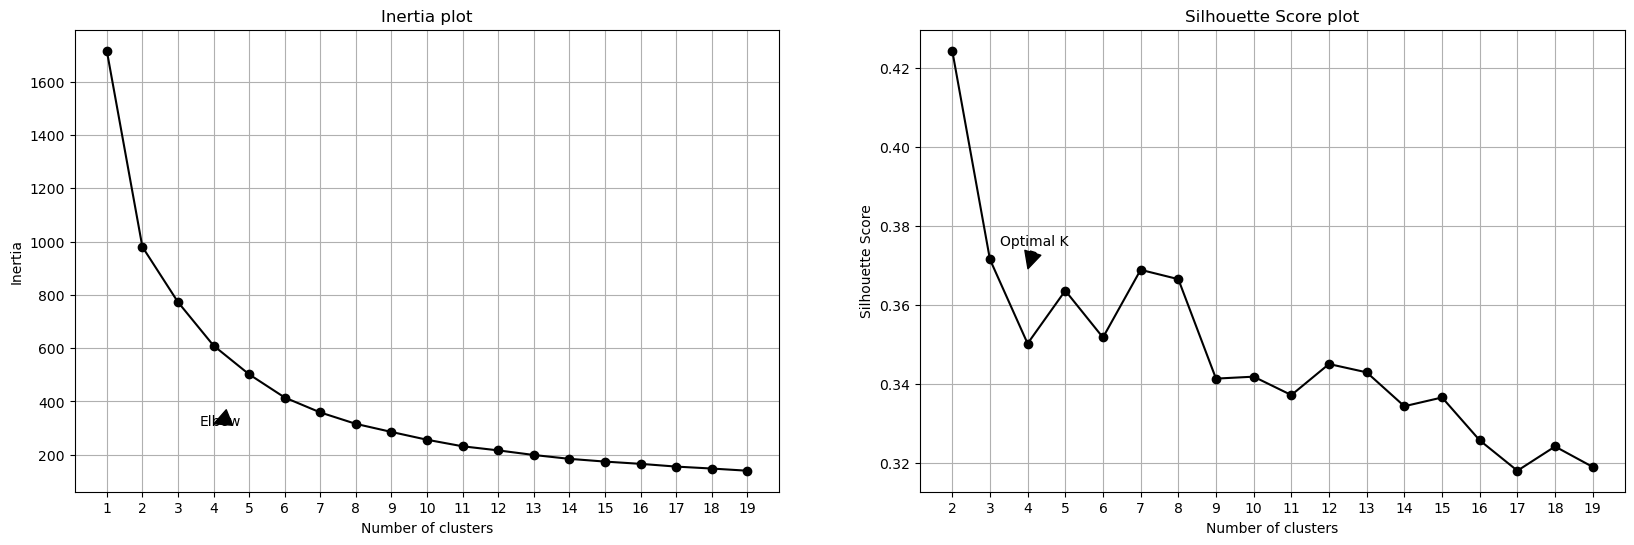

In [10]:


from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
sse = []
for k in range(1, 20):
  kmeans = KMeans(n_clusters=k,  n_init=100,random_state=0,max_iter=1000)
  kmeans.fit(features_scaled)
  sse.append(kmeans.inertia_)
# Calculate silhouette scores for different K
sil_scores = []
for k in range(2, 20):  # silhouette score is not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=100, max_iter=1000)
    kmeans.fit(features_scaled)
    score = silhouette_score(features_scaled, kmeans.labels_)
    sil_scores.append(score)
    

for k in range(2, 20):
    print(f'Silhouette Score for {k} clusters: {sil_scores[k-2]}')
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))




# Elbow method plot
number_clusters = range(1, 20)
ax1.plot(number_clusters, sse, marker='o', color='black')
ax1.grid(True)
ax1.set_xticks(number_clusters)
ax1.annotate('Elbow', xy=(4, sse[7]), xytext=(0.1, 0.2), textcoords='figure fraction', arrowprops=dict(facecolor='black', shrink=0.05))
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia')
ax1.set_title('Inertia plot')

# Silhouette method plot
ax2.plot(range(2, 20), sil_scores, marker='o', color='black')
ax2.grid(True)
ax2.set_xticks(range(2, 20))
ax2.annotate('Optimal K', xy=(4, sil_scores[5]), xytext=(0.5, 0.5), textcoords='figure fraction', arrowprops=dict(facecolor='black', shrink=0.05))
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score plot')

plt.show()



In [11]:
kmeans = KMeans(n_clusters = 4, random_state=42, n_init= 100)


kmeans.fit(features_scaled)

centroids = kmeans.cluster_centers_
identified_clusters = kmeans.fit_predict(features_scaled)

features['Cluster'] = identified_clusters

num_top_order = 2
num_middle_order = 4
num_all_rounders = 2
num_bowlers = 4

# top_order = features[features['Cluster'] == 0].nlargest(num_top_order, ['Runs.x', 'SR.x'])
# middle_order = features[features['Cluster'] == 1].nlargest(num_middle_order, ['Runs.x', 'Avg.x'])
# all_rounders = features[features['Cluster'] == 2].nlargest(num_all_rounders, ['Runs.x', 'Wkts'])
top_order = features[features['Cluster'] == 0]
middle_order = features[features['Cluster'] == 1]
all_rounders = features[features['Cluster'] == 2]
bowlers = features[features['Cluster'] == 3]

print("Top Order Batsmen:")
print(data.loc[top_order.index])
print("\nMiddle Order Batsmen:")
print(data.loc[middle_order.index])
print("\nAll Rounders:")
print(data.loc[all_rounders.index])
print("\nBowlers:")
print(data.loc[bowlers.index])



Top Order Batsmen:
              PLAYER  Mat.x  Inns.x  NO  Runs.x   HS  Avg.x   BF    SR.x  \
1     AB de Villiers     12      11   2     480   90  53.33  275  174.54   
5      Ambati Rayudu     16      16   2     602  100     43  402  149.75   
14       Chris Gayle     11      11   2     368  104  40.88  252  146.03   
15        Chris Lynn     16      16   1     491   74  32.73  377  130.23   
26    Dinesh Karthik     16      16   6     498   52   49.8  337  147.77   
40       Jos Buttler     13      13   3     548   95   54.8  353  155.24   
42  Kane Williamson      17      17   3     735   84   52.5  516  142.44   
48      Lokesh Rahul     14      14   2     659   95  54.91  416  158.41   
61          MS Dhoni     16      15   9     455   79  75.83  302  150.66   
73      Rishabh Pant     14      14   1     684  128  52.61  394  173.60   
77      Sanju Samson     15      15   1     441   92   31.5  320  137.81   
80      Shane Watson     15      15   1     555  117  39.64  359  154

In [12]:
#top 3 max value of each cluster
top_order = features[features['Cluster'] == 0].nlargest(3, ['Runs.x', 'SR.x'])
middle_order = features[features['Cluster'] == 1].nlargest(3, ['Runs.x'])
all_rounders = features[features['Cluster'] == 3].nlargest(3, [ 'Wkts', 'Runs.x'])
bowlers = features[features['Cluster'] == 2].nlargest(3, ['Wkts', 'Econ'])

In [13]:
print("Top Order Batsmen:")
print(data.loc[top_order.index])
print("\nMiddle Order Batsmen:")
print(data.loc[middle_order.index])
print("\nAll Rounders:")
print(data.loc[all_rounders.index])
print("\nBowlers:")
print(data.loc[bowlers.index])




Top Order Batsmen:
              PLAYER  Mat.x  Inns.x  NO  Runs.x   HS  Avg.x   BF    SR.x  \
42  Kane Williamson      17      17   3     735   84   52.5  516  142.44   
73      Rishabh Pant     14      14   1     684  128  52.61  394  173.60   
48      Lokesh Rahul     14      14   2     659   95  54.91  416  158.41   

    X100  ...   Ov  Runs.y  Wkts  BBI  Avg.y  Econ  SR.y  X4w  X5w  y  
42     0  ...  0.0       0     0    0      0   0.0     0    0    0  0  
73     1  ...  0.0       0     0    0      0   0.0     0    0    0  0  
48     0  ...  0.0       0     0    0      0   0.0     0    0    0  0  

[3 rows x 25 columns]

Middle Order Batsmen:
           PLAYER  Mat.x  Inns.x  NO  Runs.x  HS  Avg.x   BF    SR.x  X100  \
89    Sunil 0rine     16      16   0     357  75  22.31  188  189.89     0   
6   Andre Russell     16      14   3     316  88  28.72  171  184.79     0   
33  Hardik Pandya     13      13   4     260  50  28.88  195  133.33     0   

    ...    Ov  Runs.y  Wkts  